In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [4]:
# Load the synthetic dataset with full file path
stock_data = pd.read_csv(r"C:\Users\devan\stock_data.csv", parse_dates=['Date'], index_col='Date')

print(stock_data.head())


                 Close
Date                  
2023-01-01  136.281047
2023-01-02  148.550626
2023-01-03  179.114560
2023-01-04  261.181026
2023-01-05  361.346979


In [5]:
# Data Preprocessing
def preprocess_data(df):
    print("Preprocessing data...")
    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.any():
        print("Missing values found. Handling missing values...")
        df.dropna(inplace=True)
    else:
        print("No missing values found.")

    # Ensure data types are appropriate
    df['Close'] = df['Close'].astype(float)

    print("Data preprocessing completed.")
    return df

# Preprocess the stock data
preprocessed_data = preprocess_data(stock_data)
print(preprocessed_data.head())


Preprocessing data...
No missing values found.
Data preprocessing completed.
                 Close
Date                  
2023-01-01  136.281047
2023-01-02  148.550626
2023-01-03  179.114560
2023-01-04  261.181026
2023-01-05  361.346979


Visualizing data...


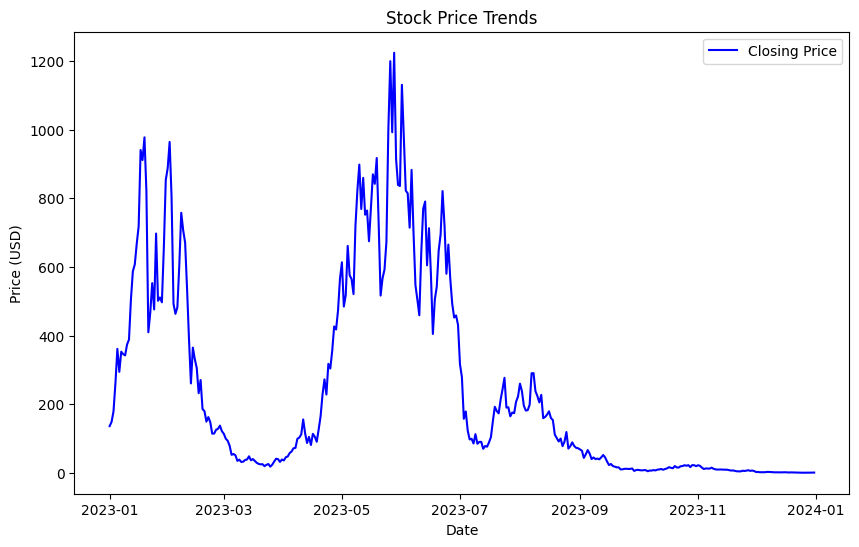

In [6]:
# Exploratory Data Analysis (EDA)
def visualize_data(df):
    print("Visualizing data...")
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Close'], label='Closing Price', color='blue')
    plt.title('Stock Price Trends')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()

# Visualize the stock price trends
visualize_data(preprocessed_data)


In [7]:
# Feature Engineering
def add_features(df):
    print("Adding features to the data...")
    # Calculate 7-day and 30-day moving averages
    df['MA7'] = df['Close'].rolling(window=7).mean()
    df['MA30'] = df['Close'].rolling(window=30).mean()

    # Calculate daily price change
    df['Price_Change'] = df['Close'].diff()

    # Calculate percentage change
    df['Pct_Change'] = df['Close'].pct_change() * 100

    print("Feature engineering completed.")
    return df

# Add features to the data
data_with_features = add_features(preprocessed_data)
print(data_with_features.head())


Adding features to the data...
Feature engineering completed.
                 Close  MA7  MA30  Price_Change  Pct_Change
Date                                                       
2023-01-01  136.281047  NaN   NaN           NaN         NaN
2023-01-02  148.550626  NaN   NaN     12.269579    9.003144
2023-01-03  179.114560  NaN   NaN     30.563934   20.574760
2023-01-04  261.181026  NaN   NaN     82.066466   45.817864
2023-01-05  361.346979  NaN   NaN    100.165953   38.351160


In [8]:
# Split the data into training and testing sets
def split_data(df, train_ratio=0.8):
    print("Splitting the data into training and testing sets...")
    train_size = int(len(df) * train_ratio)
    train_data = df[:train_size]
    test_data = df[train_size:]

    print("Training data shape:", train_data.shape)
    print("Testing data shape:", test_data.shape)
    return train_data, test_data

# Split the data
train_data, test_data = split_data(data_with_features)


Splitting the data into training and testing sets...
Training data shape: (292, 5)
Testing data shape: (73, 5)


In [9]:
from statsmodels.tsa.arima.model import ARIMA

# Model Selection
def select_model(train_data):
    print("Selecting the ARIMA model...")
    # ARIMA Model
    model = ARIMA(train_data['Close'], order=(5,1,0))
    return model

# Select the ARIMA model
model = select_model(train_data)


Selecting the ARIMA model...


C:\Users\devan\PycharmProjects\pythonProject\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\devan\PycharmProjects\pythonProject\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\devan\PycharmProjects\pythonProject\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [10]:
# Model Training
def train_model(model):
    print("Training the ARIMA model...")
    fitted_model = model.fit()
    print("ARIMA model trained successfully.")
    return fitted_model

# Train the ARIMA model
fitted_model = train_model(model)


Training the ARIMA model...
ARIMA model trained successfully.


In [11]:
# Model Evaluation
def evaluate_model(model, test_data, feature='Close'):
    print(f"Evaluating the ARIMA model for {feature}...")
    # Forecast stock prices for the specified feature
    forecast = model.forecast(steps=len(test_data))
    print("Model evaluation completed.")
    return forecast

# Evaluate the ARIMA model for a different feature (e.g., 'Open')
forecast_open = evaluate_model(fitted_model, test_data, feature='Open')

# Evaluate the ARIMA model for a different feature (e.g., 'High')
forecast_high = evaluate_model(fitted_model, test_data, feature='High')


Evaluating the ARIMA model for Open...
Model evaluation completed.
Evaluating the ARIMA model for High...
Model evaluation completed.


In [12]:
# Prediction
def make_predictions(model, steps):
    print("Making predictions...")
    # Forecast future stock prices
    forecast_values = model.forecast(steps=steps)
    print("Predictions made.")
    return forecast_values

# Number of steps (future time periods) for prediction
steps = 10  # For example, predict the next 10 time periods

# Make predictions using the ARIMA model
predictions = make_predictions(fitted_model, steps)
print("Predicted values:", predictions)


Making predictions...
Predictions made.
Predicted values: 2023-10-20    12.622224
2023-10-21    11.910866
2023-10-22    12.240389
2023-10-23    12.826781
2023-10-24    13.220638
2023-10-25    13.409975
2023-10-26    13.313747
2023-10-27    13.100198
2023-10-28    12.942138
2023-10-29    12.882939
Freq: D, Name: predicted_mean, dtype: float64
